In [104]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import keras 
from keras.datasets import cifar10
from keras import backend as K
from keras.models import Sequential 
from keras.models import model_from_json
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

%matplotlib inline 

In [82]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [83]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [84]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [101]:
prediction = loaded_model.predict(x_train[:2], verbose=1)
print(prediction.shape)
for i in range(prediction.shape[0]):
    print("prediction #%d:" % i)
    print(predicition[i])
prediction 

2/2 [==============================] - 0s
(2, 10)
prediction #0:
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
prediction #1:
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

(8, 30, 30, 32)


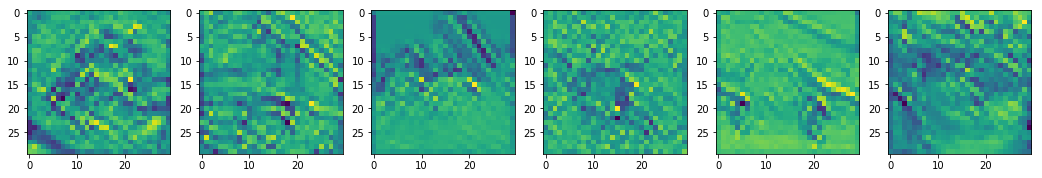

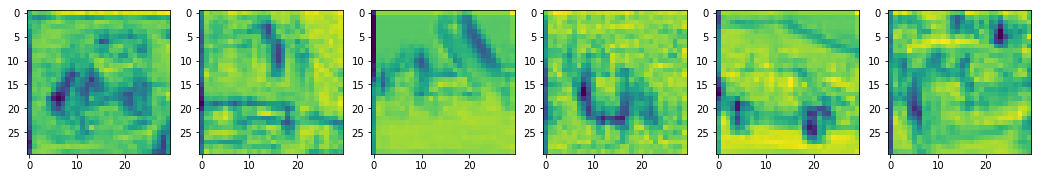

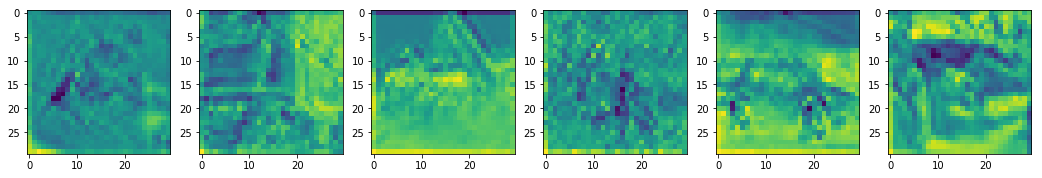

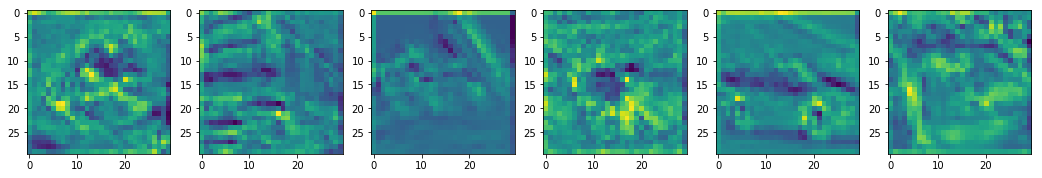

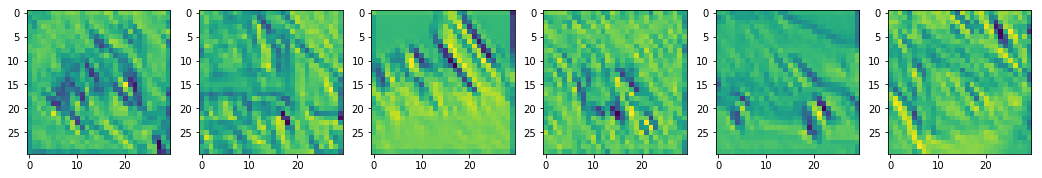

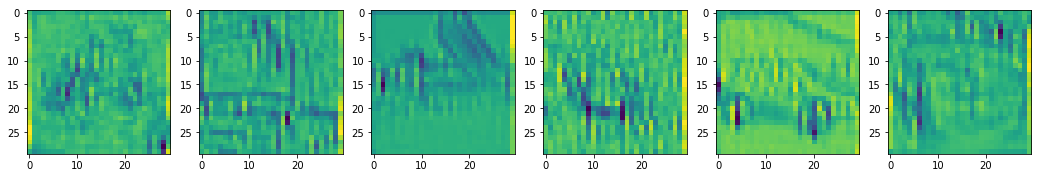

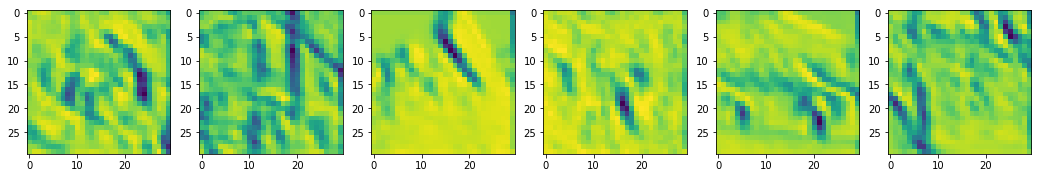

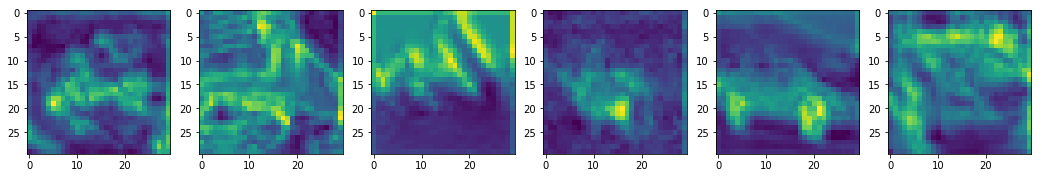

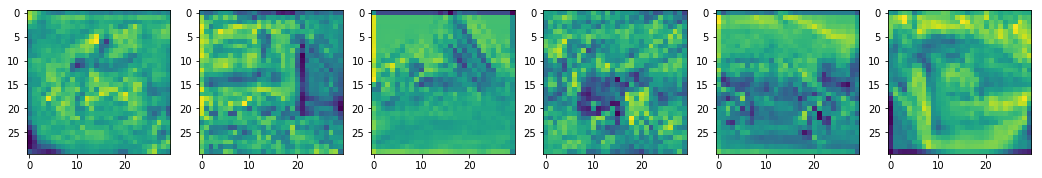

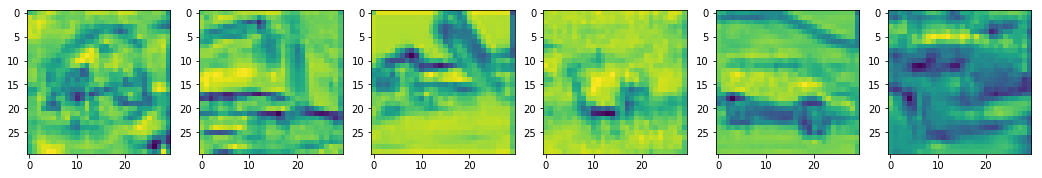

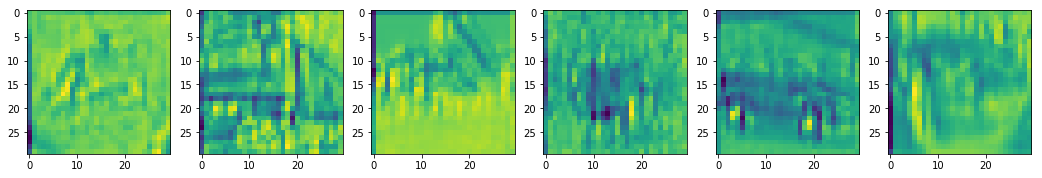

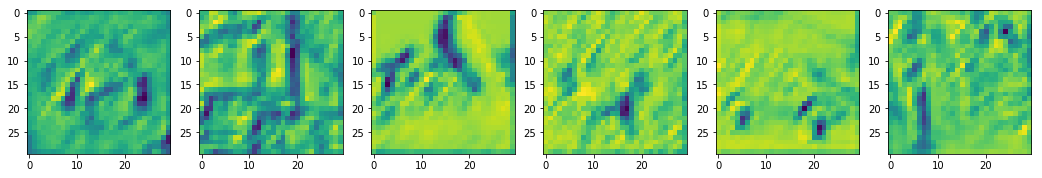

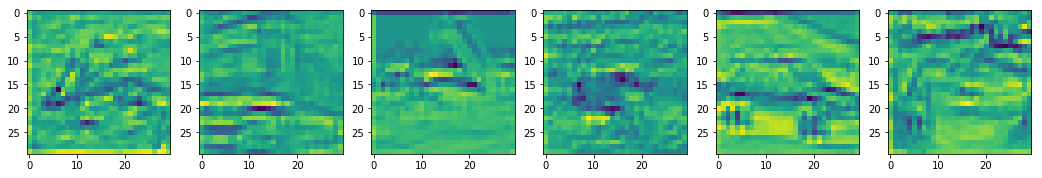

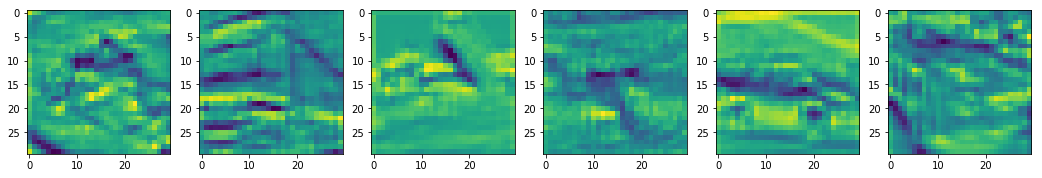

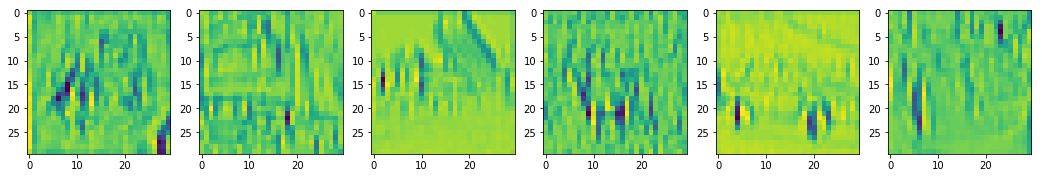

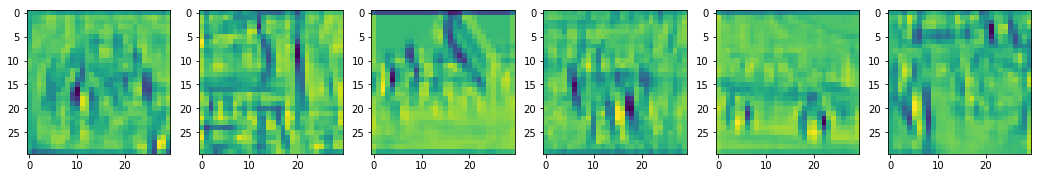

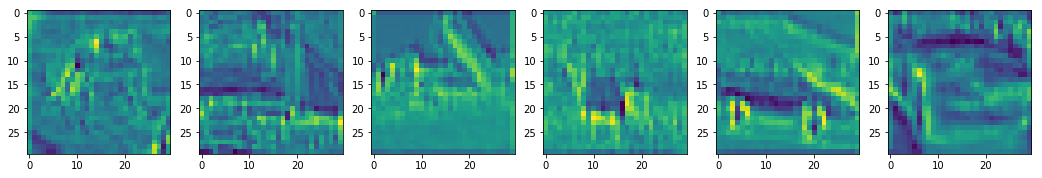

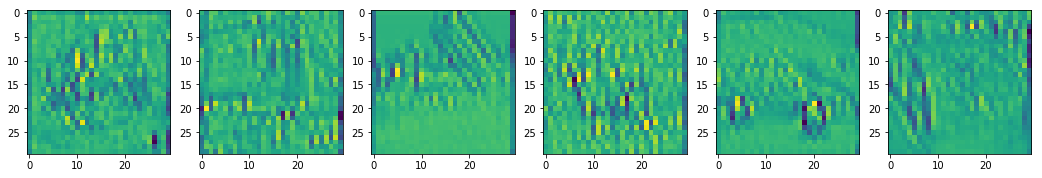

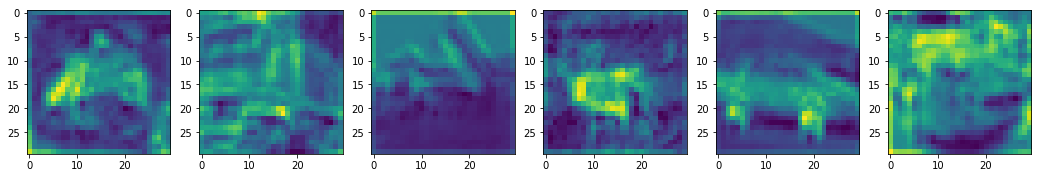

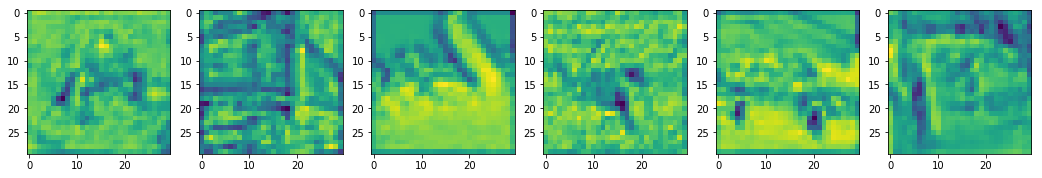

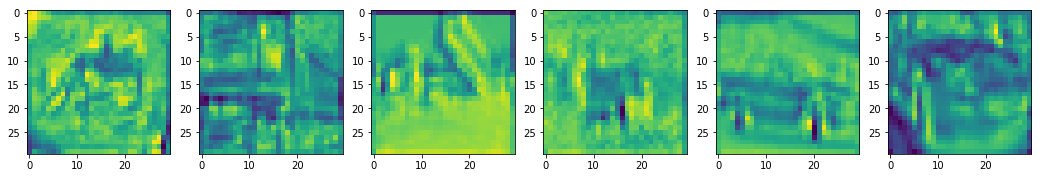

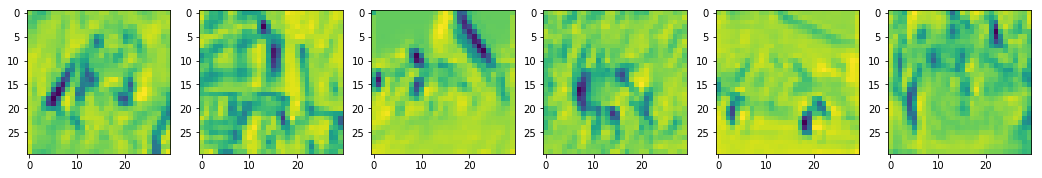

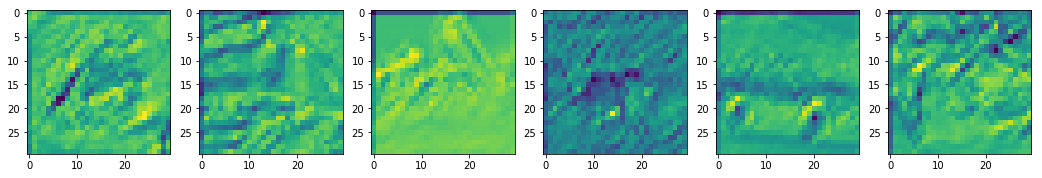

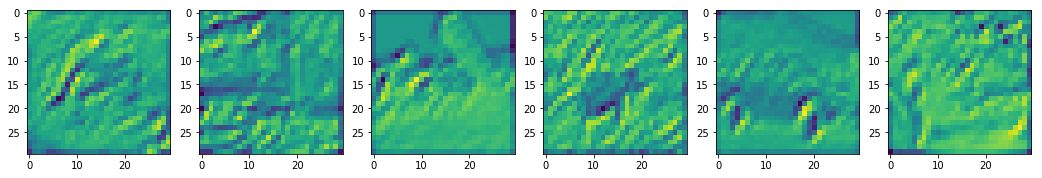

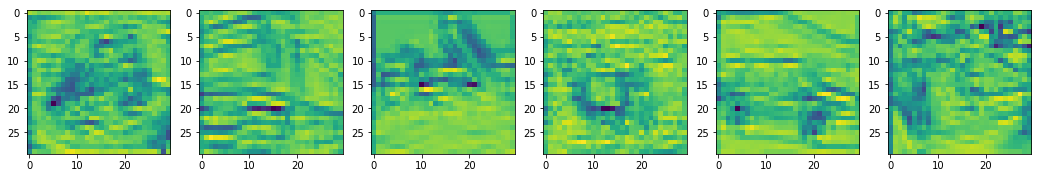

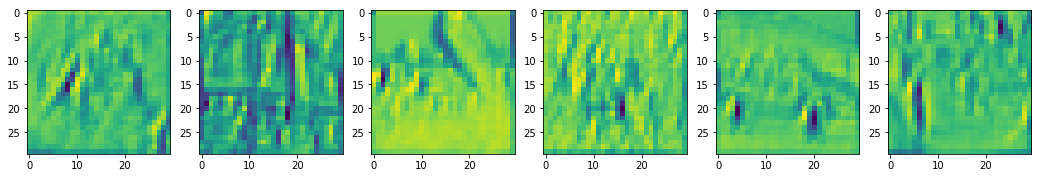

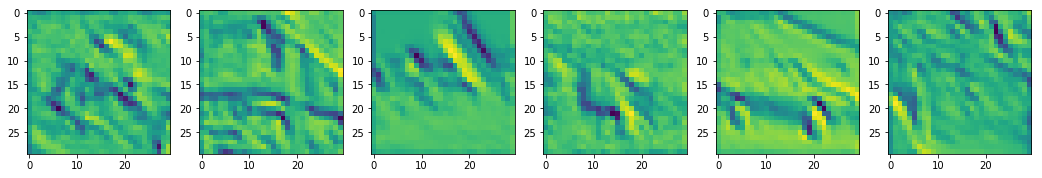

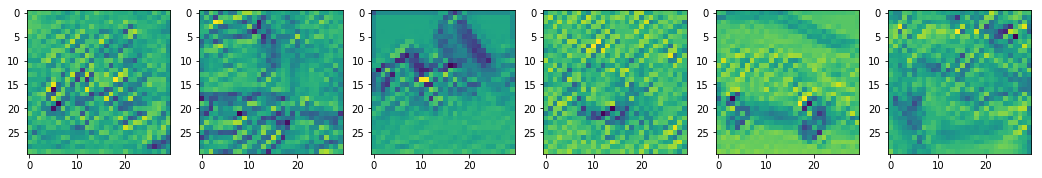

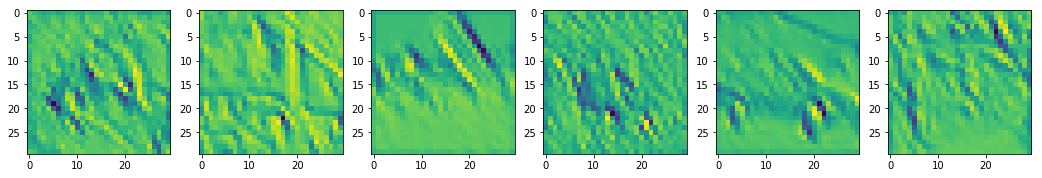

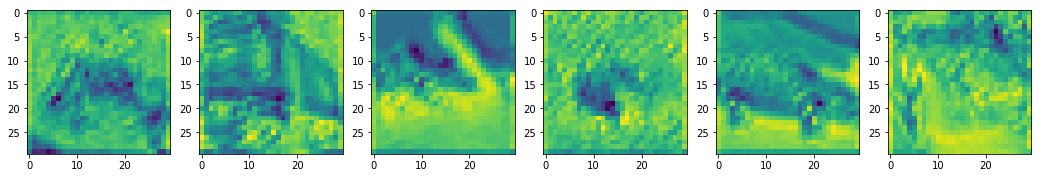

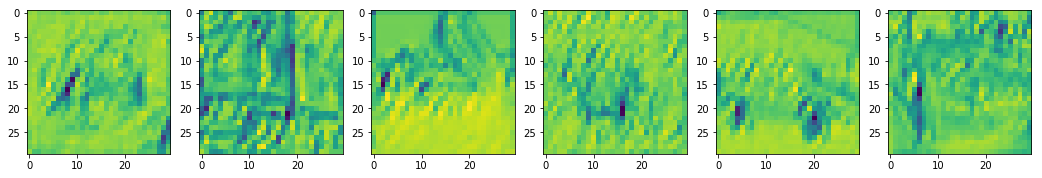

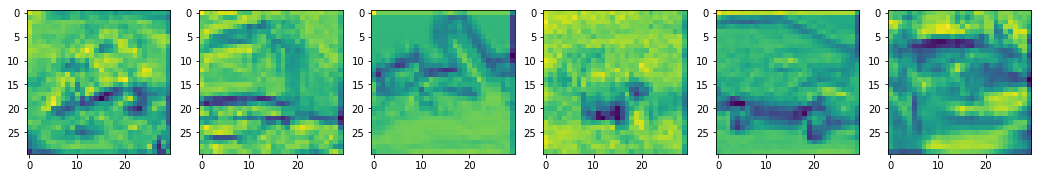

In [149]:
layer1_output = loaded_model.layers[0].output

def get_layer_output(input_val, input_layer, output_layer, phase):
    get_3rd_layer_output = K.function([loaded_model.layers[input_layer].input, K.learning_phase()],
                                  [loaded_model.layers[output_layer].output])
    return get_3rd_layer_output([input_val, phase])
# output in test mode = 0

layer_output = get_layer_output(x_train[:8], 0, 3, 0)[0]
print(layer_output.shape)
# print(layer_output[1])
# plt.imshow(layer_output[1, :, :, 2])
def plot_intermediate_outputs(index, x, output_layer, input_layer=0, phase=0):
    plt.figure(figsize=(18, 10))
    layer_output = get_layer_output(x, input_layer, output_layer, phase)[0]
    for i in range(x.shape[0]):
        plt.subplot(int(x.shape[0]/6)+1 , 6, i+1)
        plt.imshow(layer_output[i, :, :, index])
        
    plt.show()

for i in range(32):
    plot_intermediate_outputs(i, x_train[:6], 2)

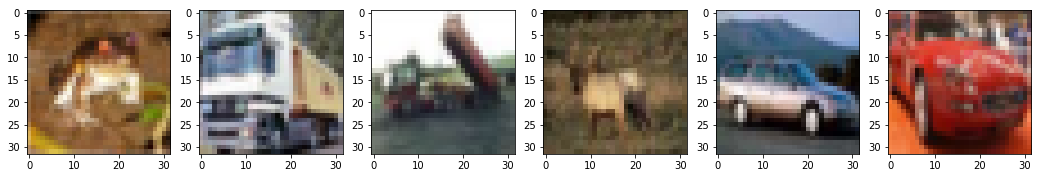

In [146]:
plt.figure(figsize=(18, 10))
reference = x_train[:6]
for i in range(reference.shape[0]):
    plt.subplot(int(reference.shape[0]/6)+1, 6, i+1)
    plt.imshow(reference[i])
    
plt.show()